# Prodigy Intern Task-3 - CAT DOG CLASSIFICATION

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 23.5MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.7MB/s]


In [3]:
import zipfile
zip=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip.extractall()
zip.close()

Importing the Dependencies

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

Apply Generators in training and testing data

In [5]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize the Image

In [6]:
#Normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

Building the Model

In [7]:
#CNN MODEL
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

Fitting and compiling the model

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 106ms/step - loss: 1.2348 - accuracy: 0.5767 - val_loss: 0.6118 - val_accuracy: 0.6642
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5804 - accuracy: 0.6938 - val_loss: 0.5538 - val_accuracy: 0.7276
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4852 - accuracy: 0.7678 - val_loss: 0.5658 - val_accuracy: 0.7224
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4120 - accuracy: 0.8118 - val_loss: 0.4740 - val_accuracy: 0.7836
Epoch 5/10
625/625 [==============================] - 63s 100ms/step - loss: 0.3587 - accuracy: 0.8429 - val_loss: 0.5598 - val_accuracy: 0.7784
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2892 - accuracy: 0.8767 - val_loss: 0.4873 - val_accuracy: 0.7816
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2138 - accuracy: 0.9122 - val_loss: 0.6283 - val_ac

Reducing the overfitting by Dropout and Batch Normalization

In [17]:
#Ways to reduce Overfitting

#1. Add More data
#2. Data Augmentation
#3. L1/L2 Regularization
#4. Dropout <-
#5. BatchNormalization <-
#6. Reduce Complexity

#plot after retraining the model

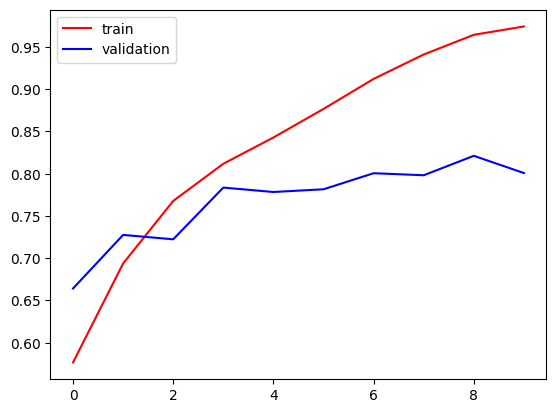

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

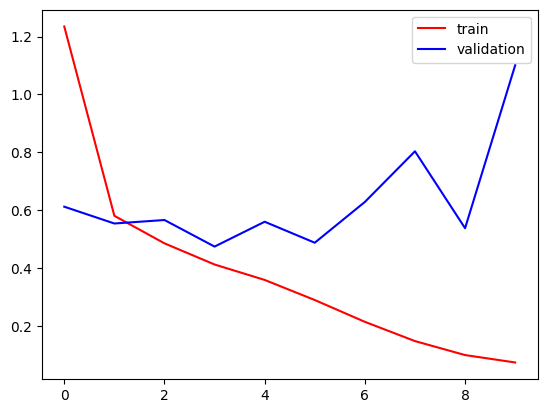

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

1 --> DOG

0 --> CAT

#Final Image Classification

In [14]:
import cv2

In [28]:
test_img=cv2.imread('/content/Dog_Breeds.jpg')

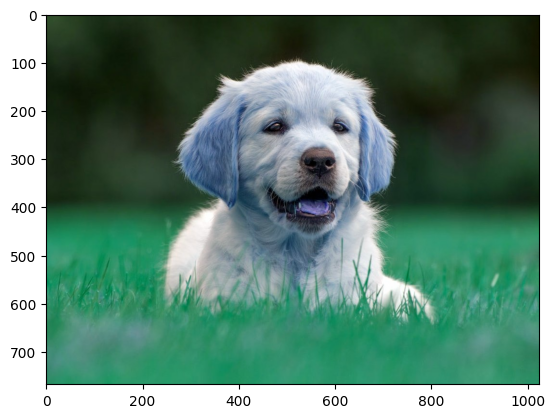

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(768, 1024, 3)

In [31]:
test_img=cv2.resize(test_img,(256,256))

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 22ms/step


array([[1.]], dtype=float32)

The Outcome of this project is to classify the Images of CATS AND DOGS using the model and predicting the result by the digits

0 for Cats

1 for Dogs